# Data acquistion, data evaluation and cleaning

**Author: Santhilata K.V, Organization:TNA**
        
This code is to read all files and find filetypes from GDS and TNA Github repos.

This code uses parallel processing for data evaluation

In [2]:
import concurrent.futures
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Dataframe settings
pd.set_option('display.max_colwidth', -1)

In [4]:
input_folder='/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/'
output_folder='/home/santhilata/Dropbox/TextFileRecognition/Code/FileSamples/outputFiles'

In [7]:
Input_df = pd.DataFrame(columns = {'File_name', 'File_path', 'File_type'})

In [8]:
files_to_avoid = {'.png','.jpeg','.ico'}                        

Get File extension

In [5]:
#function to get extension
def get_file_type(file):
    x = file.split('.')
    file_type = str('.'+x[len(x)-1] ) if len(x) > 1 else 'no_extension' 
    
    return file_type

Next two cells read files from folders recursively in parallel. It outputs a data frame. The dataframe is written to (output_folder+'/GithubData.csv').
Both cells are commented out to avoid repeating the same task

In [6]:
'''%%time'''
'''
with concurrent.futures.ProcessPoolExecutor() as executor:
    for subdir, dirs, files in os.walk(input_folder):
        
        for file in files:
            file_type = get_file_type(file)
            if (file_type not in files_to_avoid): # removes image type of files
            #df = add_file_to_df(file, subdir, file_type)
                df = pd.DataFrame({'File_name':file, 'File_path':subdir, 'File_type':file_type}, 
                                  index =[0])
                Input_df = Input_df.append(df,ignore_index=True, sort=False)
                #print(i, file, subdir)
'''

In [7]:
'''
# Write to a file 
Input_df.to_csv(output_folder+'/GithubData.csv', sep=',',index=False)
'''

In [6]:
Input_df = pd.read_csv(output_folder+'/GithubData.csv')
Input_df.tail (10)

,File_type,File_name,File_path
578315,no_extension,f5a9c156e6f25dc3fe7f9363c171487878aa7b,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/55
578316,no_extension,66c86570a03a0f6601291fa8f5374f5ce2fc57,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/c2
578317,no_extension,baef9263d287e7dfe78fd15462fc1ccb9c8ae3,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/d2
578318,no_extension,1f96b4c0e3d1b8301c908c522eec6d540b0e45,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/a7
578319,no_extension,9bfe17384b995865f899d7ba1f465261b2879a,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/1b
578320,no_extension,60af5ed556d7f5e2aeede3d11b38ca7394d4b7,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/c6
578321,no_extension,13603ae1cd6a349b893f4e3373749b59c4f496,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/75
578322,no_extension,060ce19f5c535e4cb9a867de07be0e4fae6803,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/.git/objects/f4
578323,.rb,report_mailer.rb,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/lib
578324,.rb,analytics_interface.rb,/media/santhilata/Santhi_backup/Projects/TextFileRecognition/Code/FileSamples/inputFolder/input4_GDC/alphagov_need-o-tron-daily/lib


In [7]:
len(Input_df)

578325

In [8]:
duplicateRowsDF = Input_df[Input_df.duplicated()]

In [9]:
len(duplicateRowsDF)

2

In [11]:
Input_df = Input_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [12]:
len(Input_df)

578323

# Data Exploration

Initial data

In [13]:
type_df = Input_df['File_type'].value_counts().to_frame()
#type_df is a data frame

In [14]:
type_df.reset_index(level=0, inplace=True)
type_df.columns=['File_type', 'Count']

In [15]:
# Total no.of file_types
len(type_df['File_type'])

1165

In [16]:
type_df.to_csv(output_folder+'/GithubData_types.csv', sep=',',index=False)

In [17]:
# to visualise only file_types that are more than 500
type_df_100 = type_df[type_df['Count']>=500].sort_values(['Count'], ascending=False)

In [18]:
len(type_df_100)

57

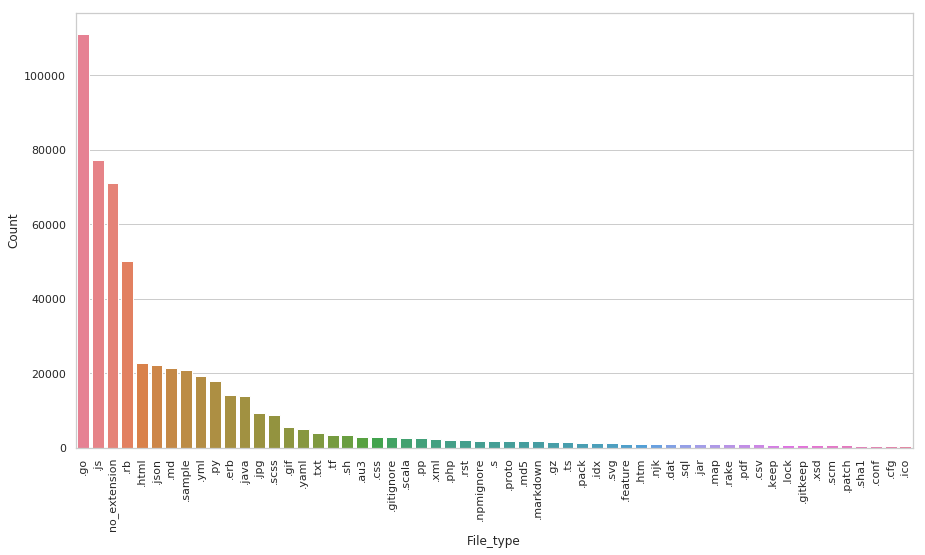

In [84]:
## image settings
#%matplotlib inline
plt.figure(figsize=(15,8))
sns.set(font_scale=1.0, style="whitegrid")

g=sns.barplot(x='File_type', y= 'Count', data =type_df_100, palette='husl')
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
plt.show(g)

# Data Cleaning
    * If a file type is understood by DROID remove it from corpus
    * Remove image files 

In [161]:
# image files to be removed
image_types = ['.png','.jpeg', '.jpg', '.gif', '.ico','.PNG', '.JPEG','.JPG', '.eps']
graphix_types = ['.svg']
feature_types = ['.feature']
executable_types = ['.jar','.arj','.pack','.pyc','.exe']
doc_files = ['.doc','.pdf']

In [162]:
# function to open file to read whether it can be read by a text editor
def is_text_file(file_path, file):
    file = file_path+file
    with open(file, 'r') as f:
            lines = [line for line in f.readlines() ]
    return len(lines)

# Step1 : Remove files that are identified by Droid

In [163]:
# This is the parallel code to use all 8 CPUs available

modified_Input_df = pd.DataFrame(columns = {'File_name', 'File_path', 'File_type'})
non_ascii_files = pd.DataFrame(columns = {'File_name', 'File_path', 'File_type'})


with concurrent.futures.ProcessPoolExecutor() as executor:
    for subdir, dirs, files in os.walk(input_folder):
        
        for file in files:
            file_type = get_file_type(file)
            # Remove all files that can be identified by Droid
            if (file_type not in (image_types+doc_files+graphix_types+executable_types)): 
            
                
                try:
                    file_path = subdir+'/'
                
                    length =  is_text_file(file_path, file)
                    
                    df = pd.DataFrame({'File_name':file, 'File_path':subdir, 'File_type':file_type}, 
                                      index =[0])
                    modified_Input_df = modified_Input_df.append(df,ignore_index=True, sort=False)
                
                except:# Exception as e: print(e)
                    df = pd.DataFrame({'File_name':file, 'File_path':subdir, 'File_type':file_type}, 
                                      index =[0])

                    non_ascii_files = non_ascii_files.append(df,ignore_index=True, sort=False)

modified_Input_df.to_csv(output_folder+'/modified_Input_df_norepeat.csv', sep=',',index=False)
non_ascii_files.to_csv(output_folder+'/non_ascii_files_norepeat.csv', sep=',',index=False)
#modified_Input_df.head(10)

**Data Exploration**

Non_ascii_files are saved into (output_folder+'/non_ascii_files_norepeat.csv'). Thes files hold no value for us. But just incase!

In [4]:
modified_Input_df = pd.read_csv(output_folder+'/modified_Input_df_norepeat.csv',sep=',' )
modified_Input_df = modified_Input_df[modified_Input_df['File_type']!='.ico']
#modified_Input_df.head(10)

non_ascii_files = pd.read_csv(output_folder+'/non_ascii_files_norepeat.csv',sep=',')

In [5]:
print(len(modified_Input_df)) # =>529008(repeat)   417903(norepeat)
duplicate_modifiedRowsDF = modified_Input_df[modified_Input_df.duplicated()] 
print(len(duplicate_modifiedRowsDF)) #=> 0 (zero)

modified_Input_df = modified_Input_df.drop_duplicates(subset=None,keep='first', inplace=False)


417903
0


In [6]:

#non_ascii_files.head(10)
print(len(non_ascii_files)) # => 33365(repeat)   23904(norepeat)
duplicated_ascii = non_ascii_files[non_ascii_files.duplicated()]
print(len(duplicated_ascii)) # => 0 (zero)


23904
0


In [27]:
'''
image_and_doc_files = (578322-(417903+23904)) #=>  omitted in the modified input
image_and_doc_files
'''

136515

In [28]:
file_types_df = modified_Input_df['File_type'].value_counts().to_frame()
file_types_df.reset_index(level=0, inplace=True)
file_types_df.columns=['File_type', 'Count']
#save to csv
file_types_df.to_csv(output_folder+'/modified_file_types.csv', sep=',',index=False) # two columns

print(len(file_types_df)) # => 1047  928(norepeat)

925


In [29]:
modified_types_100 = file_types_df[file_types_df['Count']>=500]
len(modified_types_100) # =>46

45

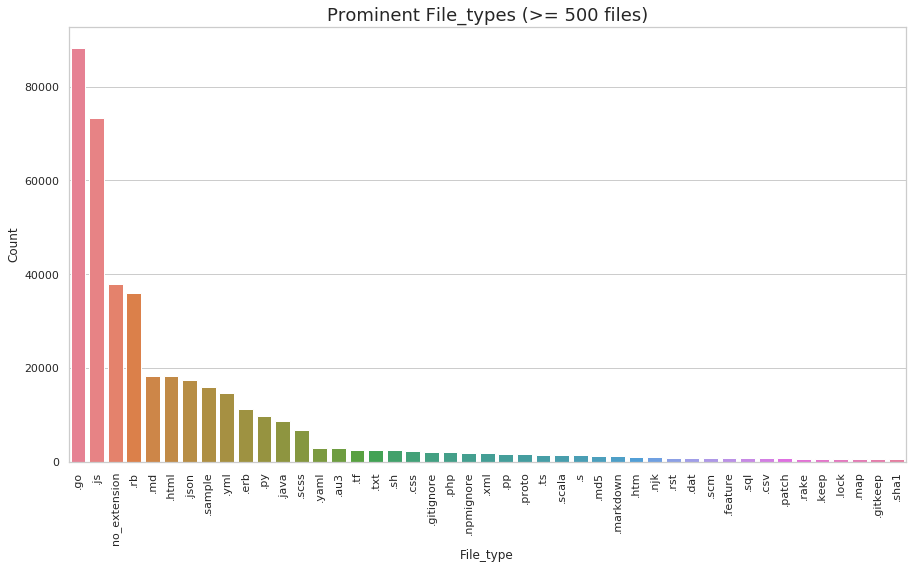

In [30]:
## image settings
#%matplotlib inline
plt.figure(figsize=(15,8))
sns.set(font_scale=1.0, style="whitegrid")

#g = sns.catplot('File_type', data=modified_Input_df, aspect=2,kind="count", color='steelblue')
g = sns.barplot(x='File_type', y= 'Count', data=modified_types_100, palette='husl')

plt.title('Prominent File_types (>= 500 files)',fontsize=18)
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
plt.show(g)

In [7]:
#.rule
programming_codes = ['.go','.js','.js?body=1','.rb','.py','.erb','.java','.sh','.au3','.AU3','.scala',
                     '.php','.ts','.python','.R','.ruby','.swift','.tcl','.zsh',
                     '.h','.hh','.kwargs','.lua', '.mako','.phpt','.pm','.po','.pot','.postinst',
                     '.textproto','.c','.cc','.cabal','.clj','.cmd','.coffee','.cs','.def','.dtd','.ejs',
                     '.cpp','.pl','.gem','.hpp','.j2', '.ps1','.postgres','.asp','.awk','.bash','.bzl','.el',
                     '.erb_old','.fish','.gradle','.groovy','.hpp','.hs','.ipynb','.j2','.jinja','.jinja2',
                     '.jq','.snippet']

markup_codes = ['.html','.json','.json5','.yml','.css','.scss','.sass','.yaml','.xml','.htm','.cshtml','.njk',
                '.xsd','.shtml','.textile','.toml','.vbs','.xjb','.yml-example',
                '.less','.hbs','kml','.libyaml','.liquid','.mdown', '.mno','.owl','.pcss','.pubxml',
                '.eot','.woff','.dist','.dtml','.fcgi','.ftl','.geojson','.pod','.puml','.rhtml',
                '.rdf', '.ttl','.custom','.apib','.haml','.iml',
                '.jsp']

text_files =['.md','.MD','.md5','.txt','.TXT','.tf','.tf#','.rst', '.markdown','idx','.pdf','.PDF','.pem',
             '.crt','.nel',
             '.ghci', '.manual','.gv','.sd','.txt#','.intro','.adoc','.aff','.asc','.dic','.docbook','.rdoc',
             '.docs','.DOCS','.document','.dot','.ex','.example','.ext','.ext1','.ext2','.ext3','.file','.gnu',
             '.godoc-app','.golang-tip','.gotip','.har','.hil','.hosts_field','.idl','.import-restrictions',
             '.iss','.jenkins','.jsonl','.manpages','.manual','.metadata','.mib','.MIT','.ovf','.psd1','.psm1',
             '.Rmd','.rst','.rtf','.rule','.rules','.sbt','.stackdump','.sum','.tex','.texi','.text',
             '.report','.uniques']

testing_files = ['.a','.autotest','.bats','.canary','.completion','.doctest','.excl','.failing_test',
                 '.filtered_test','.filters','.gemtest','.golden','.html_test','.failing_test','.panicking_test',
                 '.mock_test','.no_cases_test','.panicking_test','.passing_test','.stop_test','.test',
                 '.test_no_changes','.testignore','.unexported_test']

index_config = ['.ac','.git','.properties','.Rspec','.DotSettings','.bash_profile','.rabbitmq',
                '.reg','.Rhistory','.snyk','.specification','.sphinx','.sreq','.stamp',
                '.bash_gpg','.bazel','.before', '.bson','.cf','.cnf','.cf-extensions','.conf',
                '.cfg','.cfs_quota_us','.sysv','.Initializer','.rspec','.rspec_parallel',r'rspec-*',
                '.classpath','.closure-compiler','.conf-example','.Config','.config',r'.conflist*',
                '.csproj','.disabled','.dirs','.docker','.dockerfile', '.Dockerfile','.DotSettings',
                '.editorconfig','.install', '.install-cni','.io_serviced','.set','.settings','.snap',
                '.emacsen-install','.emacsen-remove','.emacsen-startup','.env','.env_aws','.env-aws','.flake8',
                '.flowconfig', '.gcfg','.gitattributes','.godoc_config','.guess','.handlebars','.in','.spec',
                '.svc','.sysconfig','.watchmanconfig','.xclangspec']

log_files = ['.advanced','.AppenderFactory','.bench','.changelogs','.enc','.errors','.fncache','.hp','.i',
             '.log',r'.log-*','.scimFilter','.simplecov','.stat','.sts','.tfstate','.usage_percpu',
             '.usage_in_bytes','.use_hierarchy']

security_files = ['.attack','.auth','.authz','.cer','.cert','.crl','.crt','.csr','.dark','.en','.gpg',
                  '.htpasswd','.import-restrictions','.key','.keys','.lock','.mutual-tls','.p3p','.pk8','.sec',
                  '.sha1','.sha256sum','.spc','.trusty']

support_files = ['.ackrc','.adr-dir','.after','.aix','.alerts','.am','.api','.protobuf','.symbols','.tfvars',
                 '.appl','.applications','.archive-server','.archlinux','.args', '.asax','.autoreg','.tmpl',
                 '.backend','.backupfiles','.bacon','.mailmap','.manifest','.pbfilespec','.swp','.todo','.tpl',
                 '.bnd','.bnf','.bookmarks','.boshkeep','.bowerrc','.bpf', '.branch',  '.buildpacks', '.token',
                 '.cane','.chef-11','.chm','.clang-format','.clean','.code','.com',r'.com_*','.pom','.TRAVIS',
                 '.credentials','.creq','.cross','.cross_rubies','.orig','.out','.OUT','.output','.travis',
                 '.defaults','.default','.deps','.desc','.desktop','.dev','.development','.df' ,'.diff','.dntrc',
                 '.download','.edge-marionette', '.elm', '.ember-cli','.env-dev','.env-example','.treetop',
                 '.env-integration','.env-production','.env-staging','.flow','.opts','.patch','.rabl','.twig',
                 '.fontified','.frag','.gemset','.gemspec','.generators','.generic','gitdir','.gitmodules',
                 '.pack', '.patch','.ldif','.legacy','.list','.lng','.no_interfaces','.rails3_0','.tarmaker',
                 '.rails3_1','.rbenv-gemsets','.re2js','.recipients','.rl','.ronn',r'.ruby-*','.supp','.wsdl',
                 '.slim', '.ru','.tes','.gliffy','.go-disabled','.local','.nojekyll','.slowmockserver',
                 '.goconvey','.internal','.intro', '.limit_in_bytes','.lst', '.mustache','.option','.yamllint',
                 '.p3p','.install-cni','.reek','.prebuilt','.no_package','.godir','.MF','.org','.stream',
                 '.pictClipping','.preinst','.thor','.binfmt','.gpg-id','.jsm','.jsx','.jxb','.packaging',
                 '.unknown_package','.backupfiles','failing_test','.ijmap','.suse','.autoreg','.syn','.yardopts',
                 '.archlinux','.unexported_test','.freebsd', '.helm-operator','.lintian-overrides','.tsx',
                 '.internal','.monitrc','.hash','.credentials','.jsonl','.workflow','.links','.plist','.url',
                 '.gems','.gemfile','.bash_gpg','.rhel6', '.0-jasmine-2','.htm_static', '.failing_test','.upstart',
                 '.symbols','.cf-extensions','.passing_test','.sublime-project','.disabled','.pill','.eot','.l',
                 '.rails3_1','.excl','.omnios','.sublime-keymap','.standard-tls','.sty','.mockserver',
                 '.fact','.single','.rhel5','.tmLanguage','.jbuilder','.jmx','.job','.jade','.jst','.updater',
                 '.gitkeet','.workflow','.gyp','gypi','.htaccess','.network','.nginx','.postrm','.proxy',
                 '.tailor','.template','.templates','.tern-port','.tern-project']

data_files = ['.data','.dat','.sql','.csv','.CSV','.db','.tsuru-db','.input','.inventory','.jsonnet','.kxf',
              '.laccdb','.rex','.sed','.sqlite3','.srl','.tsv','.wsb']

system_files = ['.pp','.s','.proto','.pod','.curl','.initd','.fncache','.rcp','.binfmt','.builder','.buildtools',
                '.cfs_quota_us','.clamd','.common','.cron','.d','.drv','.fact','.foodcritic','.foreman','.fuzz',
                '.hidden','.init','.jsonld','.lint','.m4','.makefile','.mk','.mkd','.MockMaker','.plugins',
                '.process','.service','.systemd']

others = ['.feature','.map','.rake','.scm',  '.completion',r'.ts-*','.deb','.Debian','.debian-wheezy', 
          '.ubuntu','.solaris', '.APACHE','.APACHE2', '.ignore',r'.gitignore*','.eslintignore','.dockerignore',
          '.buildignore', '.bashrc','.jscsrc','.jshintrc','.BSD', '.DS_STORE','.envrc','.eslintrc','.netrc',
          '.git_ignore','.npmignore','.cfignore','.lintignore','.max_usage_in_bytes','.mime','.min', '.babelrc',
          '.gemrc', '.nix','.no_package','.nope','.npmhcl','.npmrc','.ntk','.numa_stat','.nunj','.nvmrc','.nycrc',
          '.generators','.uml','.plantuml','.xdp','.diag','.eex','.empty','.esprima','.exists','.expected',
          '.flux','.gox','.prerm','.preseed','.prettierrc','.prod','.project','.protobuf','.python-version',
          '.graffle','.graphml','.gv','.handlers','.hcldec','.hcl','.hcle','.hclt','.here','.heroku','.hgtags',
          '.hiera-eyaml','.iapp','.inc','.info','.ini','.iso','.keep','.keep_me','.agignore','.datignore',
          '.bzrignore','.jshintignore','.git_keep','.gitallowed','.gitkeep','.pdkignore','.slugignore','.qrc',
          '.datignore','.jamignore','.helmignore','.hgignore','.bzignore','.keep-me-for-dev', '.LESSER',
          '.LICENSE','.base','.base-versions','.ruby_version','.beta-versions','.cookiecutterrc', '.coveragerc',
          '.mod','.mof','.monitrc','.mtail','.mus','.n3','.name','.old', '.pact','.phaseroots','.pkgs','.yarnrc',
          '.go-version','.rej','.replay','.repo','.result','.rlx','.rng','.rpm','.Rproj','.source','.sub',
          '.run_twice_test','.rvmrc','.sample','.saved','.sch','.scm','.sd','.skip','.slang','.sln','.stx',
          '.pmtignore','.powrc','.pryrc','.pub','.pug','.pylintrc','.rakeTasks','.rbenv-version','.ViewRenderer',
          '.rc','.tt','.ttar','.ttl','.types','.ubuntu-precise','.ubuntu-trusty','.ubuntu-xenial','.version',
          '.svnignore','.swf','.syn','.t','.tap','.tar','.targ','.targets','.template_version','.unknown',
          '.terraform-version','.terraformrc','.tgz','.THIRD_PARTY','.tm_properties','.tmLanguage','.tmpfiles',
          '.unknown_interface','.unknown_package','.unused','.vale','.vb','.vbproj','.vcl','.vcxproj','.vim',
          '.vm','.vue','.watchr','.webdemo','.website','.wheezy','.whitelist','.without_colon','.wsx','.x',
          '.xenial','.xlf','xlsx','.xpm','.xsd','.xsl','.xslt','.y','.zip','.ziphash']

user_given_exts = ['rro','.hun','.laws','.law','.por','.bug','.met','.mea','.suc','.sla','.la','.amm',
                   '.killer','.ill','.let','.mor','.aix','.lin','.pro','.far','.bc','.lis','.obs','.alp','.phd',
                   '.oem','.wel','.quo','.gir','.90s','.fus','.dumpty','.geog','.ics','.quips','.gra','.hel',
                   '.hor','.cn1','.odd','.elf','.ong','.pun','.rogers','.aut','.group_by','.please-update',
                   '.somedotfile','.spelling_failures','.two_dupes_one_good','.yaml-e']

exclude_files = ['.eps',r'.*~','.exs','.js~','.json~','.md~' ,'md~HEAD','.tf~','.yml~']

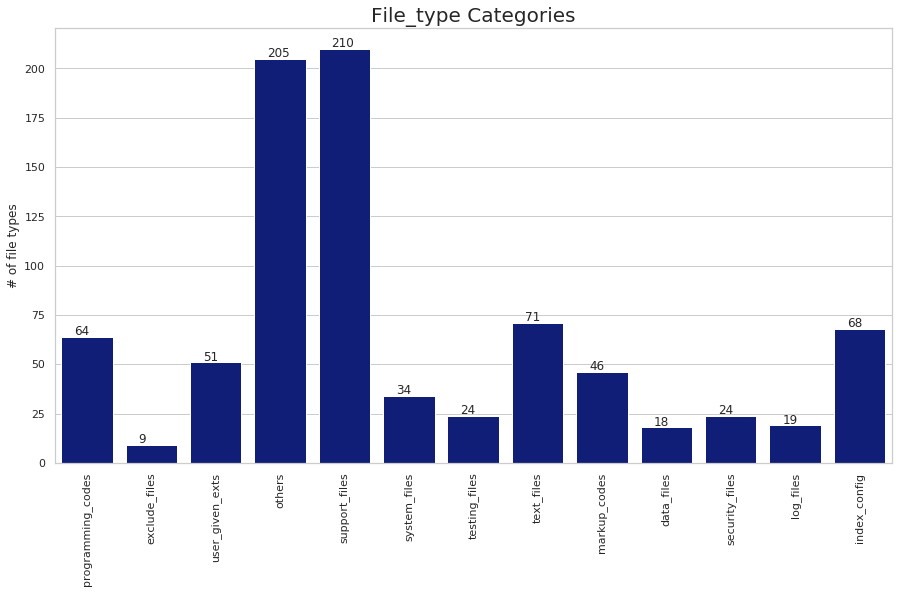

"\nfig, ax = plt.subplots()\nax.pie(values, labels=category_names, autopct='%10.1f%%')\nax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.\nax.set_title('File types')\n"

In [9]:
categories = [programming_codes, exclude_files, user_given_exts,others, support_files, system_files,
              testing_files, text_files,markup_codes,  data_files, security_files,
              log_files, index_config]

category_names = ['programming_codes', 'exclude_files', 'user_given_exts','others', 'support_files', 'system_files',
              'testing_files', 'text_files','markup_codes',  'data_files', 'security_files',
              'log_files', 'index_config']
indices_x = [categories.index(x) for x in categories]
values = [len(x) for x in categories]

temp_df = pd.DataFrame({'File_category':category_names,'Values':values})

plt.figure(figsize=(15,8))
sns.set(font_scale=1.0, style="whitegrid")

g = sns.barplot(x=category_names, y= values, color='#001188')#palette='husl')
#plt.scatter(x=indices_x, y=values, s=values*2, c='red')
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=90)
plt.ylabel('# of file types')
plt.title('File_type Categories', fontdict={'size':20})

for p in g.patches:
    g.annotate('%d'%p.get_height(), (p.get_x()+0.2, p.get_height()+1))

plt.show(g)


'''
fig, ax = plt.subplots()
ax.pie(values, labels=category_names, autopct='%10.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('File types')
'''



In [10]:
total_annotated_categories = sum([len(x) for x in categories])
print(total_annotated_categories)

843


In [11]:
uncategorised = (928-843) # 85

In [12]:
#file_types_df = pd.read_csv(output_folder+'/modified_file_types.csv', sep=',') # only two columns

In [13]:
def get_category(file):
    for i in  range(0,13):
        if file in categories[i]:
            return (category_names[i])
        
    return ('Uncategorised')

In [ ]:
file_types_df['File_category'] = file_types_df['File_type'].apply(lambda x: get_category(x))

In [25]:
#file_types_df.to_csv(output_folder+'/modified_file_types.csv', sep=',',index=False) # three columns
file_types_df = pd.read_csv(output_folder+'/modified_file_types.csv', sep=',')

In [26]:
file_types_df.head(10)

,File_type,Count,File_category
0,.go,88320,programming_codes
1,.js,73264,programming_codes
2,no_extension,37813,Uncategorised
3,.rb,36005,programming_codes
4,.md,18344,text_files
5,.html,18292,markup_codes
6,.json,17538,markup_codes
7,.sample,16055,others
8,.yml,14643,markup_codes
9,.erb,11333,programming_codes


In [27]:
file_types_df =file_types_df.groupby(['File_category']).sum().reset_index(drop=False)
file_types_df.File_category = pd.Categorical(file_types_df.File_category, categories=category_names, ordered=True)
file_types_df = file_types_df.sort_values('File_category')
file_types_df

,File_category,Count
7,programming_codes,241371
2,exclude_files,71
13,user_given_exts,8
6,others,24895
9,support_files,3683
10,system_files,4910
11,testing_files,206
12,text_files,27911
5,markup_codes,67801
1,data_files,2482


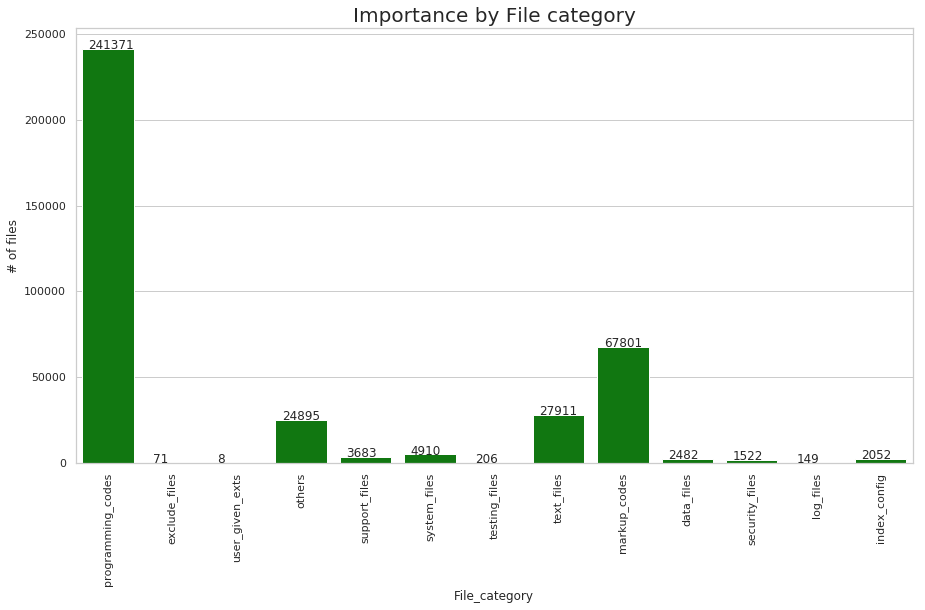

In [28]:
#plt.figure(figsize=(15,8))
sns.set(font_scale=1.0, style="whitegrid")

fig, ax = plt.subplots(figsize=(15,8))
#file_types_df.groupby(['File_category']).sum()['Count'].plot.bar(color='#BB0000')
g1 =sns.barplot(x='File_category', y='Count', data = file_types_df,color='#008800')
loc, labels = plt.xticks()
g1.set_xticklabels(labels, rotation=90)
plt.title('Importance by File category',fontdict={'size':20} )
plt.ylabel('# of files')

for p in g1.patches:
    g1.annotate('%d'%p.get_height(), (p.get_x()+0.1, p.get_height()+50))
plt.show(g1)

In [29]:
temp_df_a = pd.merge(temp_df,file_types_df, on='File_category', how='outer')
temp_df_a = temp_df_a.iloc[0:13,0:3]
temp_df_a['Values'] = temp_df_a['Values'].apply(lambda x: int(x))


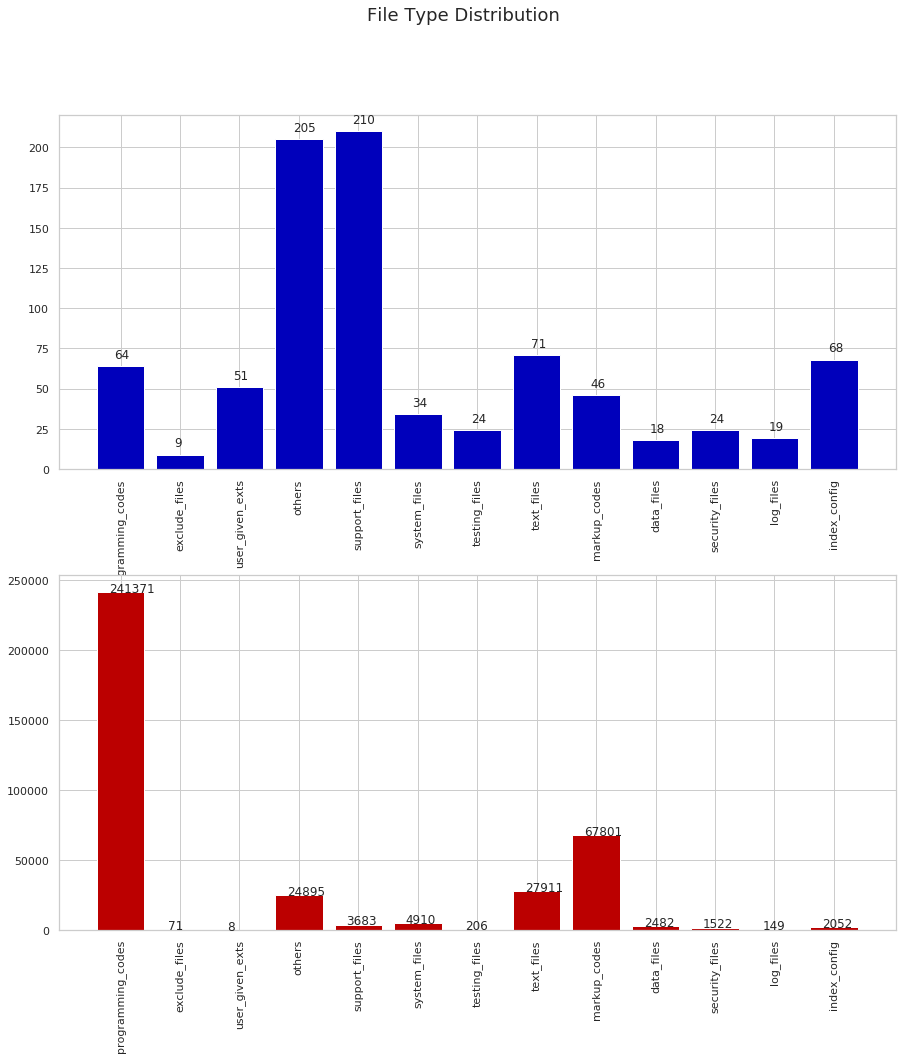

In [30]:
#plt.style.use('seaborn-white')
# Two subplots
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,15))
ax1.bar(temp_df_a.File_category, temp_df_a.Values,color='#0000BB')
ax2.bar(temp_df_a.File_category, temp_df_a.Count,color='#BB0000')

ax1.xaxis.set_visible(True)
ax1.yaxis.set_visible(True)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
        
for p in ax1.patches:
    ax1.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

plt.subplots_adjust(hspace=0.3)    
ax2.xaxis.set_visible(True)
ax2.yaxis.set_visible(True)

for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
#plt.show(ax)
for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x()+0.2, p.get_height()+5))


f.suptitle('File Type Distribution',fontsize=18)
plt.show()


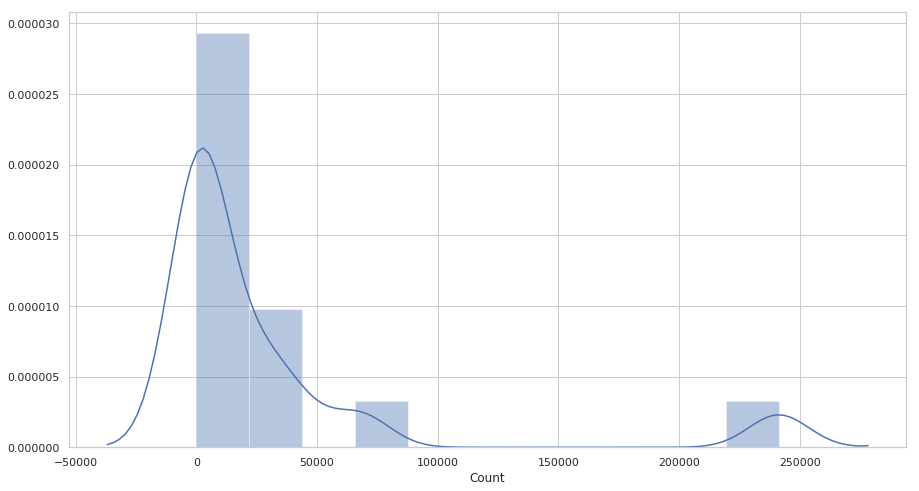

In [31]:
plt.figure(figsize=(15,8))
sns.distplot(file_types_df['Count'])

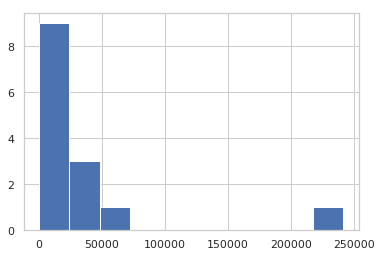

In [21]:
file_types_df['Count'].hist()

Following cell is incomplete. Complete it later

In [ ]:
#add a column for file description
fileType_description_dict = {
    '.sh': 'Shell script',
    '.au3': 'AutoIt is an open source BASIC-like scripting language designed for automating the Windows GUI',
    '.pp': 'Project pre-processor file https://filext.com/file-extension/pp',
    '.s': 'Assembler file',
    
    '.gz': 'gunzip file',
    
    '.py': 'Python source code',   
    '.pdb': 'Python debugger',
    '.py3': 'Python 3',
    '.ipynb': 'Python jupyter notebook',
    '.java':'Java source code',   
    '.js': 'JavaScript',
    '.ts': 'TypeScript code, by Microsoft',    
    '.go': 'Golang source code',
    '.scala': 'Scala source code',
    '.rb': 'Ruby source code',
    '.erb': 'eRuby is a language to embed Ruby codes into text files',
    
    '.xml': 'XML file',
    '.proto': 'Protocol Buffers. This file compiles with protoc'
    '.json': 'JSON file',
    '.html': 'HTML',
    '.htm': 'HTML',
    '.njk': 'HTML like code',
    '.yml': 'YAML file. Compatible with many types: ex, Javascript Texts',
    '.php': 'PHP source code',
    '.css': 'Style sheets',
    '.scss':'Style sheets like .css',
    '.xsd': 'XML Schema Definition',
    
    
    '.md5': 'Checksum file',
    
    '.tf': 'Transcript file https://filext.com/file-extension/TF',
    '.txt': 'A common text file',
    '.csv': 'Comma separated file',
    '.md': 'Git markdown text',
    '.markdown': 'Markdown text',
    '.rst': 'Restructured Text',
    '.sample': 'Primarily associated with Apple II operating system https://filext.com/file-extension/SAMPLE',
    '.dat': 'Data file',
    '.sql' : 'SQL file',
    '.idx': 'Movie subtitle file',
    
    '.map': 'Game map file to generate binary formats',
    '.rake': 'Rake file',
    '.lock': 'LOCK file',
    '.tes': 'TES file is a Tool Encapsulation Specification'
    
    '.gitignore': 'Specifies intentionally untracked files to ignore',
    '.npmignore':'Specifies intentionally untracked files to ignore',
    '.keep': 'git like house keeping',
    '.gitkeep': 'git house keeping',
    '.patch': 'Differences between two git versions',
    '.completion': 'A simple text file. Arbitrary file extension',
    '.nel':'Net motion event log',
    
        
    }
    